## SDS Social Sphere Collab Project

### EDA Objectives
* Profile demographics (age, gender, academic level, country) and social-media behaviors.
* Explore distributions and relationships among key variables, including usage patterns, mental health, and sleep.
    E.g. links between Avg_Daily_Usage_Hours, Mental_Health_Score, Sleep_Hours_Per_Night, and etc.
* Analyze and visualize patterns related to target variables: Conflicts_Over_Social_Media and Addicted_Score.
* Assess differences across countries and platforms.
* Handle missing values, encode categorical variables, detect outliers, and flag potential data biases.


In [4]:
#Required libraries for the EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
%matplotlib inline

In [5]:
# Load dataset
df = pd.read_csv('../data/ssma.csv')

# Display the first few rows of the dataset
print(df.head())

# Display the column names
print(df.columns)

# Display the data types of the columns
print(df.dtypes)

   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

In [6]:
# Display the first few rows to verify the data loaded correctly
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (705, 13)


Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Social_Media  \
0                    6     In Relationship                            3   
1                    8              Single                            0   
2                    5         Complicated                            4   
3                    7              Single                            1   
4                    6     In Relationship                            2   

   Addicted_Score  
0               8  
1               3  
2               9  
3               4  
4               7

#### As part of EDA, Pandas Profiling is being used below as a python library that not only automates the EDA process but also creates a detailed EDA report comprising summary statistics and vizualizations. The report generated is really helpful in identifying patterns in the data and finding out the characteristics of the data. 

In [7]:
profile = ProfileReport(df, title="Dataset Profiling Report", explorative=True)
profile.to_file("eda_report.html")
#profile.to_widgets()
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 447.57it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### The following are inferences that can be drawn from the data profiling as above:
1.	There are a total 13 Variables with 7-Numerics, 4-Categoricals, 1 of Text & Boolean each
2.	There are 705 observations in all making the size or shape of the dataset being (705,13)
3.	There are no missing cells, rows or duplicate rows.
4. The dataset data definition are as follows:
* Student_ID -	Unique respondent identifier
* Age -	Age in years
* Gender -	“Male” or “Female”
* Academic_Level -	High School / Undergraduate / Graduate
* Country -	Country of residence
* Avg_Daily_Usage_Hours -	Average hours per day on social media
* Most_Used_Platform -	Instagram, Facebook, TikTok, etc.
* Affects_Academic_Performance -	Self‐reported impact on academics (Yes/No)
* Sleep_Hours_Per_Night -	Average nightly sleep hours
* Mental_Health_Score -	Self‐rated mental health (1 = poor to 10 = excellent)
* Relationship_Status -	Single / In Relationship / Complicated
* Conflicts_Over_Social_Media -	Number of relationship conflicts due to social media
* Addicted_Score -	Social Media Addiction Score (1 = low to 10 = high)

Other statistical inferences and conclussions can be obtained from the dataset profiling report as above and will be infered further in the following analysis and modelling


    

#### Pairwise scatter plots:
* Avg_Daily_Usage_Hours vs. Mental_Health_Score
* Avg_Daily_Usage_Hours vs. Sleep_Hours_Per_Night     

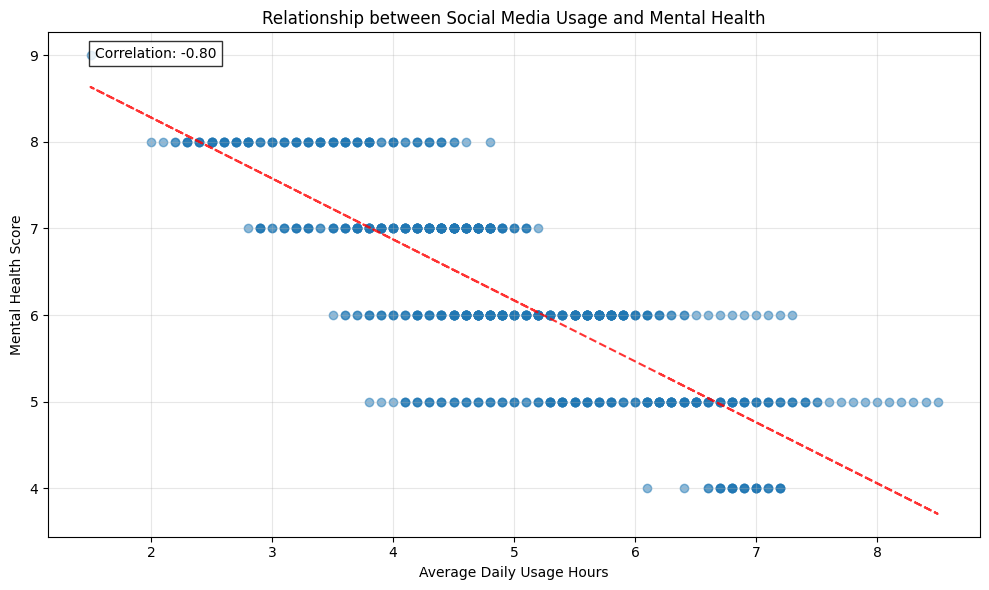

In [8]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Avg_Daily_Usage_Hours'], df['Mental_Health_Score'], alpha=0.5)

# Add labels and title
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Mental Health Score')
plt.title('Relationship between Social Media Usage and Mental Health')

# Add a trend line
z = np.polyfit(df['Avg_Daily_Usage_Hours'], df['Mental_Health_Score'], 1)
p = np.poly1d(z)
plt.plot(df['Avg_Daily_Usage_Hours'], p(df['Avg_Daily_Usage_Hours']), "r--", alpha=0.8)

# Add correlation coefficient
correlation = df['Avg_Daily_Usage_Hours'].corr(df['Mental_Health_Score'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.grid(True, alpha=0.3)
plt.tight_layout()

##### The following conclusions can be drawn from above Pairwise Scatter Plot:
1. Strong Negative Correlation:
The correlation coefficient is -0.80, which indicates a strong negative relationship between average daily social media usage hours and mental health score. As social media usage increases, mental health scores tend to decrease.
2. Trend Line:
The red dashed line (regression line) visually confirms this negative trend: higher usage hours are associated with lower mental health scores.
3. Interpretation:
This suggests that individuals who spend more time on social media each day generally report poorer mental health, while those who use social media less tend to have higher mental health scores.
4. Causation vs. Correlation:
While the plot shows a strong association, it does not prove that increased social media usage causes poorer mental health—other factors could be involved.

 **Summary:**
The main conclusion is that there is a strong negative relationship between social media usage and mental health in this dataset: more time spent on social media is associated with lower mental health scores.

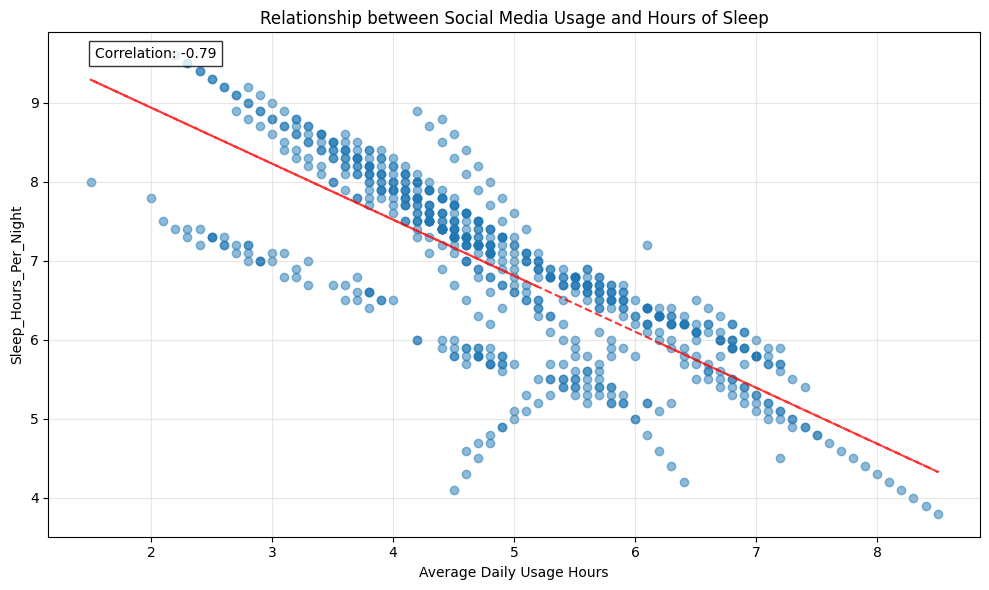

In [9]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Avg_Daily_Usage_Hours'], df['Sleep_Hours_Per_Night'], alpha=0.5)

# Add labels and title
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Sleep_Hours_Per_Night')
plt.title('Relationship between Social Media Usage and Hours of Sleep')

# Add a trend line
z = np.polyfit(df['Avg_Daily_Usage_Hours'], df['Sleep_Hours_Per_Night'], 1)
p = np.poly1d(z)
plt.plot(df['Avg_Daily_Usage_Hours'], p(df['Avg_Daily_Usage_Hours']), "r--", alpha=0.8)

# Add correlation coefficient
correlation = df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.grid(True, alpha=0.3)
plt.tight_layout()

 The possible conclusions that can be drawn are as follows:
1. Strong Negative Correlation:
The correlation coefficient is -0.79, which indicates a strong negative relationship between average daily social media usage hours and hours of sleep per night.
As social media usage increases, the number of hours of sleep per night tends to decrease.
2. Trend Line:
The downward-sloping trend line visually confirms this negative relationship.
3. Interpretation:
People who spend more time on social media generally get less sleep.
This suggests that higher social media usage may be associated with poorer sleep habits or reduced sleep duration.
4. Practical Implication: 
If the goal is to improve sleep duration, reducing social media usage could be a potential strategy.

** Please Note:**
Correlation does not imply causation. While there is a strong association, tplot does not prove that social media usage causes less sleep—other factors could be involved.

#### Grouped Bar Plot Investigation

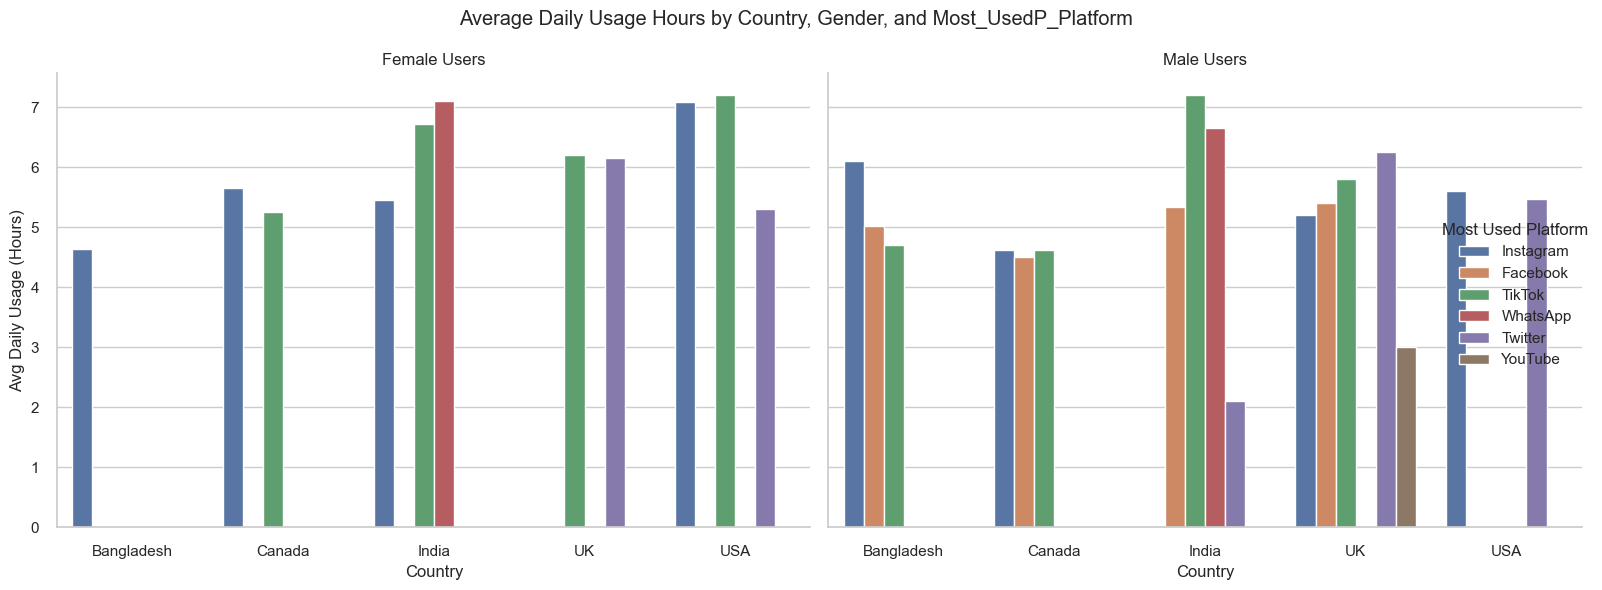

In [10]:
plt.style.use('seaborn-v0_8')

# Columns: 'Country', 'Gender', 'Platform', 'Avg_Daily_Usage_Hours'

# Select specific countries
selected_countries = ['USA', 'UK', 'Canada', 'Bangladesh','India']
filtered_df = df[df['Country'].isin(selected_countries)]

# Group and compute the mean
grouped_df = df.groupby([filtered_df['Country'], 'Gender', 'Most_Used_Platform'])['Avg_Daily_Usage_Hours'].mean().reset_index()

# Set plot style
sns.set(style="whitegrid")


# Create the grouped bar plot using seaborn's catplot
g = sns.catplot(
    data=grouped_df,
    x='Country', 
    y='Avg_Daily_Usage_Hours', 
    hue='Most_Used_Platform', 
    col='Gender',
    kind='bar',
    height=6, 
    aspect=1.2,
    legend_out=True  # Place legend outside the plot
)

# Set plot labels and titles
g.set_axis_labels("Country", "Avg Daily Usage (Hours)")
g.set_titles("{col_name} Users")
g._legend.set_title('Most Used Platform')
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Average Daily Usage Hours by Country, Gender, and Most_UsedP_Platform")

plt.tight_layout()

The grouped boxplot investigation revealed the interractions amongst some variables - specifically the targest "Average Daily Usage in Hours" in each of selected 5 countries. For each of these 5 countries and for Males and Females, it shows the mean of hours spent on each of the Social medium Platfrom.

### Boxplots Investigation

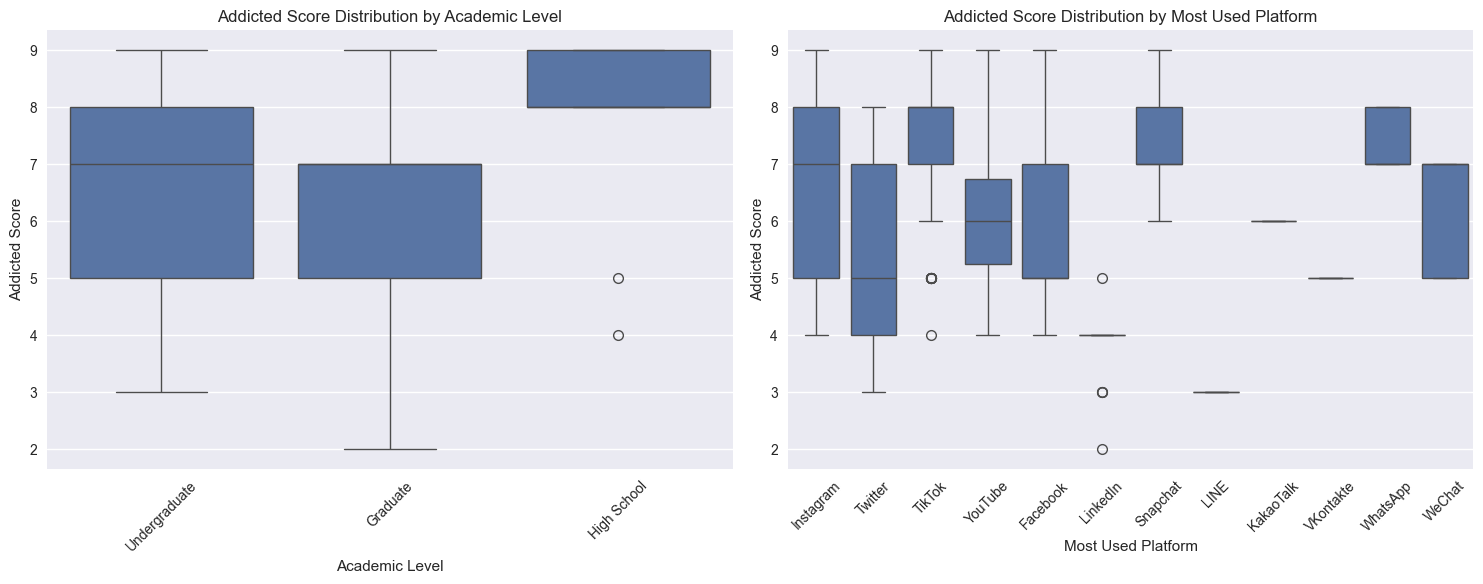

In [11]:
# Set the style for better visualization
plt.style.use('seaborn-v0_8')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for Addicted_Score by Academic_Level
sns.boxplot(x='Academic_Level', y='Addicted_Score', data=df, ax=ax1)
ax1.set_title('Addicted Score Distribution by Academic Level')
ax1.set_xlabel('Academic Level')
ax1.set_ylabel('Addicted Score')
ax1.tick_params(axis='x', rotation=45)

# Boxplot for Addicted_Score by Most_Used_Platform
sns.boxplot(x='Most_Used_Platform', y='Addicted_Score', data=df, ax=ax2)
ax2.set_title('Addicted Score Distribution by Most Used Platform')
ax2.set_xlabel('Most Used Platform')
ax2.set_ylabel('Addicted Score')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
#plt.savefig('boxplots.png', dpi=300, bbox_inches='tight')
#plt.close() 

### Heatmap Correlations with Conflicts_Over_Social_Media and Addicted_Score

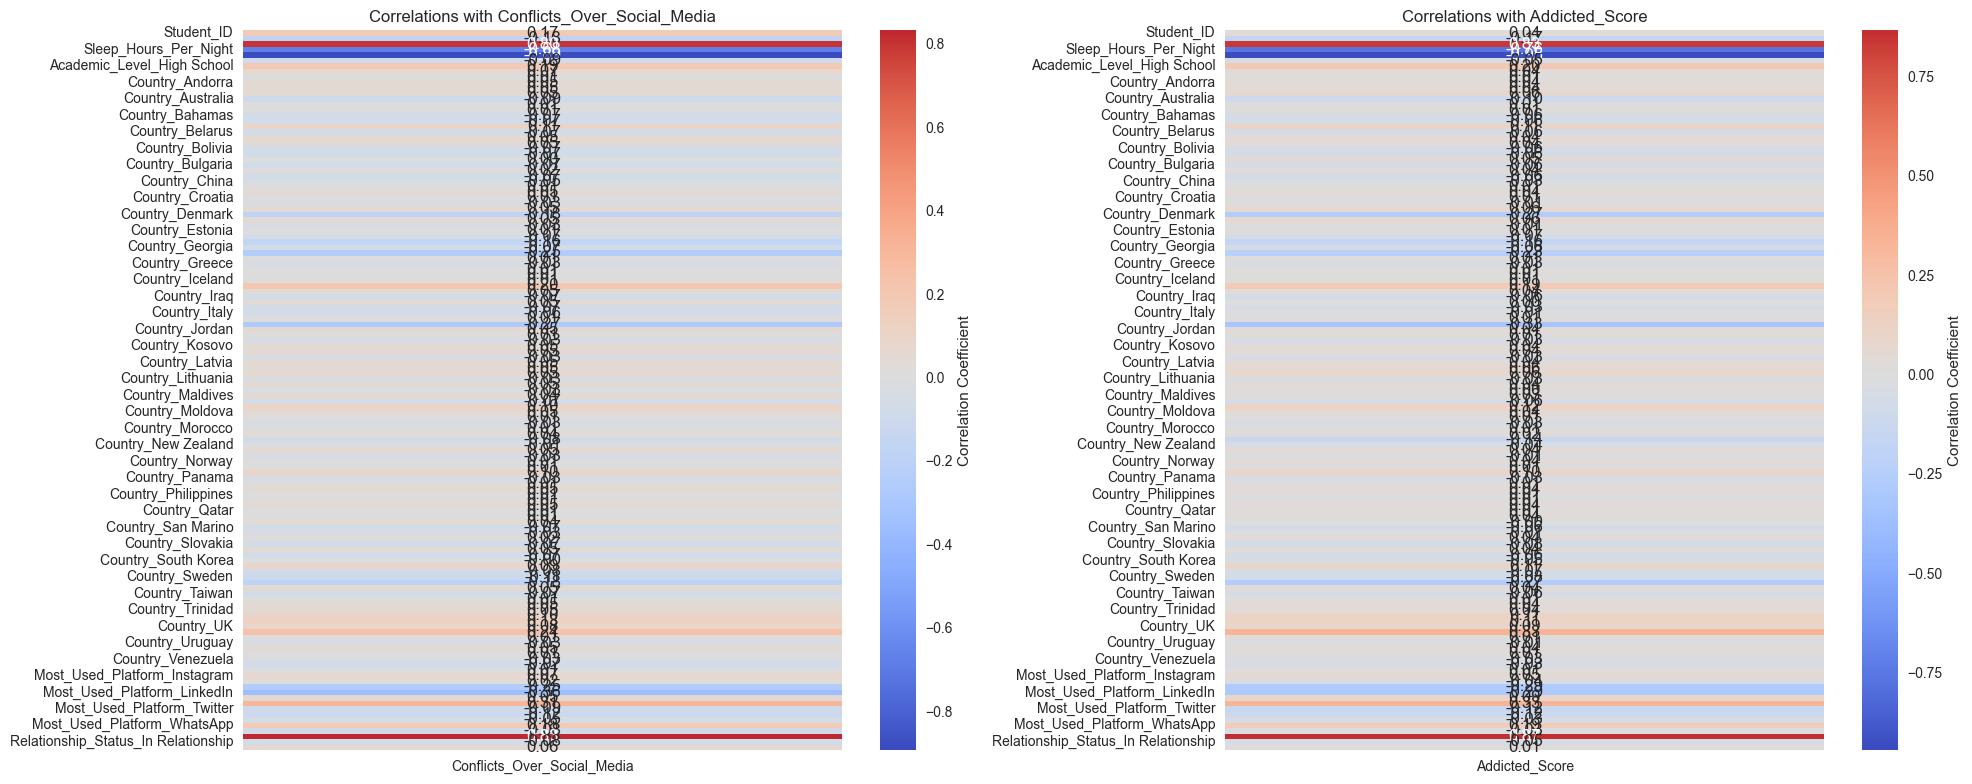

In [12]:
# Calculate correlations with target variables
target_vars = ['Conflicts_Over_Social_Media', 'Addicted_Score']
#correlations = df.corr()[target_vars].drop(target_vars)


# Identify categorical columns (excluding target variables)
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col not in target_vars]

# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# One-hot encode categorical variables
if len(categorical_cols) > 0:
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

correlations = df_encoded.corr()[target_vars].drop(target_vars)

# Calculate correlations with target variables
correlations = {}
for target in target_vars:
    correlations[target] = df_encoded.corr()[target].drop(target_vars)


# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot heatmap for Conflicts_Over_Social_Media
sns.heatmap(correlations['Conflicts_Over_Social_Media'].to_frame(), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            ax=ax1,
            cbar_kws={'label': 'Correlation Coefficient'},
            fmt='.2f')
ax1.set_title('Correlations with Conflicts_Over_Social_Media')

# Plot heatmap for Addicted_Score
sns.heatmap(correlations['Addicted_Score'].to_frame(), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            ax=ax2,
            cbar_kws={'label': 'Correlation Coefficient'},
            fmt='.2f')           
ax2.set_title('Correlations with Addicted_Score')

# Adjust layout and save
plt.tight_layout()
#plt.savefig('correlation_heatmaps.png', dpi=300, bbox_inches='tight')
#plt.close() 

In [13]:
#df_encoded.shape
#target_vars

In [14]:
df_encoded['Conflicts_Over_Social_Media'].unique()

array([3, 0, 4, 1, 2, 5])

### Data Preprocessing

##### Checking for Missing Data

##### Handling Categorical variables

###### Gender Column

###### Academic_Level Column

###### Affects_Academic_Performance Column

###### Relationship_Status Column

##### Creating the Training & Test Sets

###### Getting the inputs and output

###### Getting the Training Set and the Test Set

### Building & Training Models

### Evaluating Model